In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
vale = yf.Ticker("VALE3.SA")
vale.info


HTTPError: 401 Client Error: Unauthorized for url: https://query1.finance.yahoo.com/v7/finance/quote?formatted=true&lang=en-US&symbols=VALE3.SA

In [263]:
tickers=["HSML11.SA", "DIVO11.SA"]
dist=np.array([19.13,18.49, 1.39, 0.08, 0.97]) /100
ativos = yf.download(tickers, start="2018-01-01")['Adj Close'].dropna()
ativos.tail()

[*********************100%***********************]  2 of 2 completed


,DIVO11.SA,HSML11.SA
Date,,
2023-09-25,80.650002,94.610001
2023-09-26,79.639999,94.220001
2023-09-27,79.379997,93.269997
2023-09-28,80.099998,93.800003
2023-09-29,80.330002,93.820000


<Axes: xlabel='Date'>

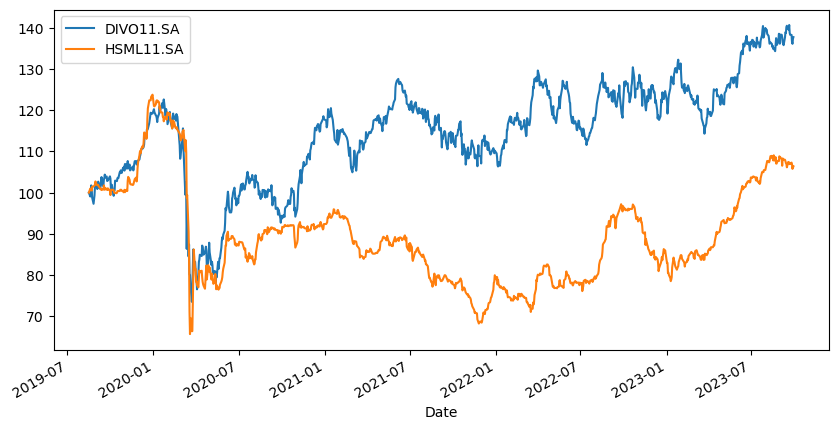

In [264]:
(ativos / ativos.iloc[0] * 100).plot(figsize=(10,5))

In [265]:
log_returns= np.log(ativos / ativos.shift(1))
cov = log_returns.cov() * 250
cov_mercado = cov.iloc[0,1]
cov_mercado

0.016216968771103697

In [266]:
var_mercado = log_returns[tickers[1]].var() * 250
var_mercado

0.056864897759296984

In [267]:
beta = cov_mercado / var_mercado
beta

0.2851841717846462

In [268]:
ativo_livre_risco = (0.005 *12) # poupança
premio_risco = (12.75/100) # selic

capm = ativo_livre_risco + beta * premio_risco

In [269]:
print("Retorno Esperado de", tickers[0], "para valer correr o risco tem que ser de no ano:", round(capm*100,2), "%" )

Retorno Esperado de HSML11.SA para valer correr o risco tem que ser de no ano: 9.64 %


In [270]:
sharpe = (capm -ativo_livre_risco) / (log_returns[tickers[0]].std() * 250 ** 0.5 )
sharpe

0.17180370939850143